In [6]:
import pandas as pd

# Load the dataset
df = pd.read_csv(r"E:\Projects\CyberSec\NLP based URL phishing\NLP-phishingURL-detection\data\PhiUSIIL_Phishing_URL_Dataset_UCIrvine.csv")


# Display the first 5 rows
df.head()


,FILENAME,URL,URLLength,Domain,DomainLength,IsDomainIP,TLD,URLSimilarityIndex,CharContinuationRate,TLDLegitimateProb,...,Pay,Crypto,HasCopyrightInfo,NoOfImage,NoOfCSS,NoOfJS,NoOfSelfRef,NoOfEmptyRef,NoOfExternalRef,label
0,521848.txt,https://www.southbankmosaics.com,31,www.southbankmosaics.com,24,0,com,100.0,1.000000,0.522907,...,0,0,1,34,20,28,119,0,124,1
1,31372.txt,https://www.uni-mainz.de,23,www.uni-mainz.de,16,0,de,100.0,0.666667,0.032650,...,0,0,1,50,9,8,39,0,217,1
2,597387.txt,https://www.voicefmradio.co.uk,29,www.voicefmradio.co.uk,22,0,uk,100.0,0.866667,0.028555,...,0,0,1,10,2,7,42,2,5,1
3,554095.txt,https://www.sfnmjournal.com,26,www.sfnmjournal.com,19,0,com,100.0,1.000000,0.522907,...,1,1,1,3,27,15,22,1,31,1
4,151578.txt,https://www.rewildingargentina.org,33,www.rewildingargentina.org,26,0,org,100.0,1.000000,0.079963,...,1,0,1,244,15,34,72,1,85,1


In [7]:
# Check dataset shape
print("Dataset shape:", df.shape)

# Check columns and data types
print(df.info())

# Check summary statistics
print(df.describe())

# Check missing values
print(df.isnull().sum())

Dataset shape: (235795, 56)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235795 entries, 0 to 235794
Data columns (total 56 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   FILENAME                    235795 non-null  object 
 1   URL                         235795 non-null  object 
 2   URLLength                   235795 non-null  int64  
 3   Domain                      235795 non-null  object 
 4   DomainLength                235795 non-null  int64  
 5   IsDomainIP                  235795 non-null  int64  
 6   TLD                         235795 non-null  object 
 7   URLSimilarityIndex          235795 non-null  float64
 8   CharContinuationRate        235795 non-null  float64
 9   TLDLegitimateProb           235795 non-null  float64
 10  URLCharProb                 235795 non-null  float64
 11  TLDLength                   235795 non-null  int64  
 12  NoOfSubDomain               235795 non-null 

C:\Users\91914\AppData\Local\Temp\ipykernel_10412\2331610765.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['label'], palette="Set2")


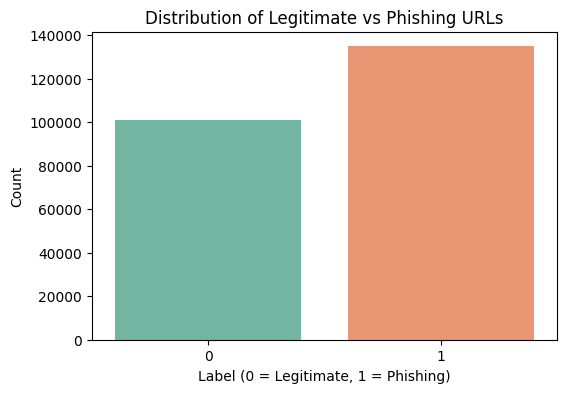

label
1    134850
0    100945
Name: count, dtype: int64
Percentage phishing: 57.19 %


In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6,4))
sns.countplot(x=df['label'], palette="Set2")
plt.title("Distribution of Legitimate vs Phishing URLs")
plt.xlabel("Label (0 = Legitimate, 1 = Phishing)")
plt.ylabel("Count")
plt.show()

print(df['label'].value_counts())
print("Percentage phishing:", round(df['label'].value_counts(normalize=True)[1]*100, 2), "%")


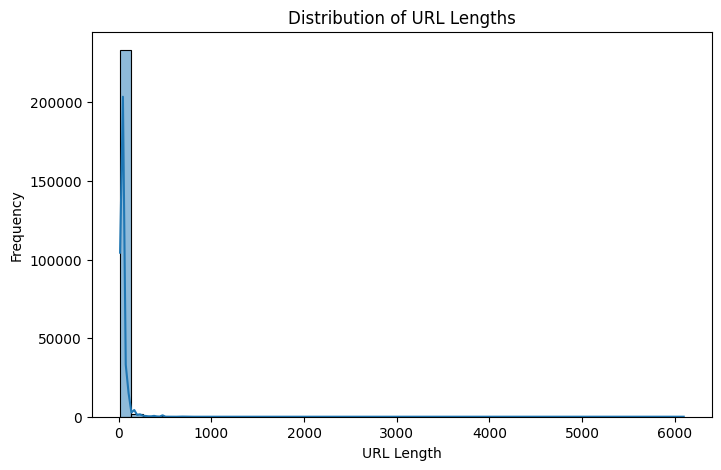

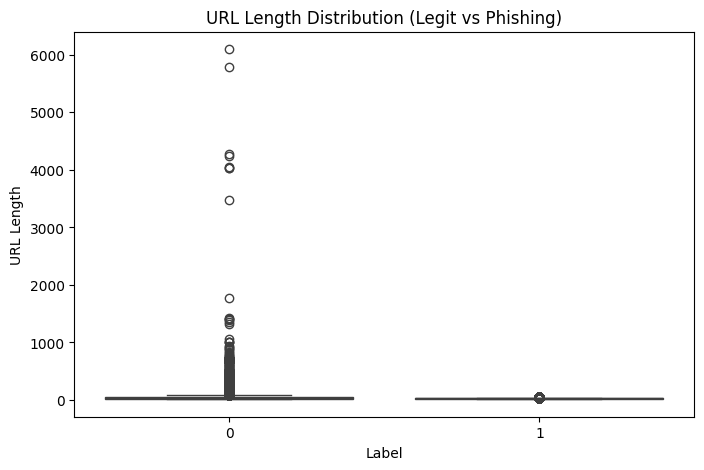

In [10]:
df['url_length'] = df['URL'].apply(len)

plt.figure(figsize=(8,5))
sns.histplot(df['url_length'], bins=50, kde=True)
plt.title("Distribution of URL Lengths")
plt.xlabel("URL Length")
plt.ylabel("Frequency")
plt.show()

# Compare phishing vs legitimate URL lengths
plt.figure(figsize=(8,5))
sns.boxplot(x='label', y='url_length', data=df)
plt.title("URL Length Distribution (Legit vs Phishing)")
plt.xlabel("Label")
plt.ylabel("URL Length")
plt.show()


In [11]:
print("Average phishing URL length:", df[df['label']==1]['url_length'].mean())
print("Average legitimate URL length:", df[df['label']==0]['url_length'].mean())

print("\nMedian phishing URL length:", df[df['label']==1]['url_length'].median())
print("Median legitimate URL length:", df[df['label']==0]['url_length'].median())


Average phishing URL length: 27.228609566184648
Average legitimate URL length: 46.238773589578486

Median phishing URL length: 27.0
Median legitimate URL length: 34.0
